# Case study on Pre-processing

# Do the following on titanic dataset.
1.Load the dataset into python environment
2.Make ‘PassengerId’ as the index column
3.Check the basic details of the dataset
4.Fill in all the missing values present in all the columns in the dataset
5.Check and handle outliers in at least 3 columns in the dataset
6.Do min max scaling on the feature set (Take ‘Survived’ as target)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import Series,DataFrame

# 1.Load the dataset into python environment

In [3]:
df=pd.read_csv(r'C:/Users/user/Downloads/titanic_dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2.Make ‘PassengerId’ as the index column

In [4]:
df.set_index("PassengerId",inplace=True)

In [5]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3.Check the basic details of the dataset

In [6]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [10]:
df.shape

(891, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4.Fill in all the missing values present in all the columns in the dataset

the misssing value is present the following colums: Age, Cabin, Embarked

In [14]:
data_fill=df.fillna(method='ffill',axis=0).fillna(0)
data_fill.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


In [15]:
data_fill.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [16]:
df["Age"]=df["Age"].fillna(df["Age"].median())
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df["Age"].isna().sum()

0

In [18]:
df['Cabin'].mode() #drop Cabin

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [19]:
df.drop("Cabin",axis=1,inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
df["Embarked"].mode()

0    S
dtype: object

In [21]:
df["Embarked"].fillna('S',inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
df["Embarked"].isna().sum()

0

In [23]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

# 1. FARE

#to check Outliers

Text(0.5, 1.0, 'BoxPlot of Fare')

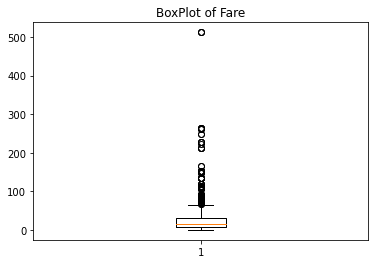

In [24]:
plt.boxplot(df["Fare"])
plt.title("BoxPlot of Fare")

#remove the outlier

In [25]:
Q1=np.percentile(df["Fare"],25,interpolation='midpoint')
Q2=np.percentile(df["Fare"],50,interpolation='midpoint')
Q3=np.percentile(df["Fare"],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [26]:
df["Fare"].median()

14.4542

#To find IQR

In [27]:
IQR=Q3-Q1


In [28]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

-26.724
65.6344


In [29]:
outlier=[]
for x in df["Fare"]:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [30]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [164]:
ind1=df["Fare"]>up_lim
df.loc[ind1].index

Int64Index([  3,   5,   6,   7,  12,  13,  15,  16,  18,  20,
            ...
            878, 879, 882, 883, 884, 885, 887, 888, 890, 891],
           dtype='int64', name='PassengerId', length=488)

In [165]:
df=df.drop(df.loc[ind1].index)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,28.0,0,0,239853,0.0,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S


In [166]:
df.shape

(15, 10)

Text(0.5, 1.0, 'BoxPlot of Fare')

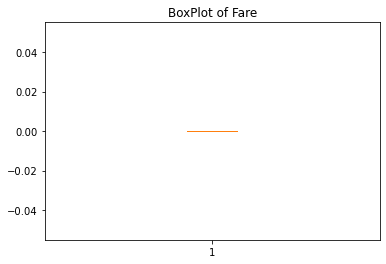

In [167]:
plt.boxplot(df["Fare"])
plt.title("BoxPlot of Fare")

# 2.SibSp

Text(0.5, 1.0, 'BoxPlot of SIBSP')

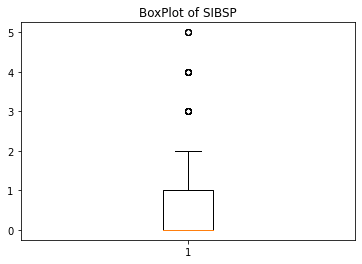

In [34]:
plt.boxplot(df["SibSp"])
plt.title("BoxPlot of SIBSP")


In [35]:
Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')   
Q3=np.percentile(df['SibSp'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)  

0.0
0.0
1.0


In [36]:
IQR=Q3-Q1

In [37]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)          
print(up_lim)

-1.5
2.5


In [38]:
outlier=[]
for x in df['SibSp']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [39]:
outlier

[3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4,
 4]

In [158]:
ind2=df['SibSp']>up_lim
df=df.drop(df.loc[ind2].index)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S


In [159]:
df.shape

(503, 10)

Text(0.5, 1.0, 'BoxPlot of SIBSP')

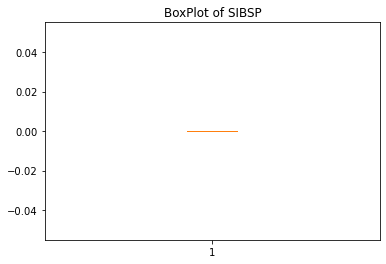

In [160]:
plt.boxplot(df["SibSp"])
plt.title("BoxPlot of SIBSP")


# 3 Parch

Text(0.5, 1.0, 'Boxplot of Parch')

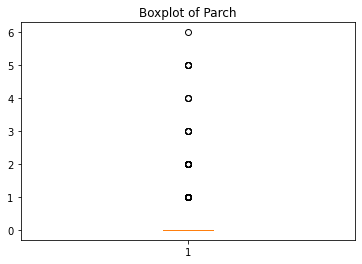

In [42]:
plt.boxplot(df['Parch'])
plt.title('Boxplot of Parch')

In [43]:
Q1=np.percentile(df['Parch'],25,interpolation='midpoint')
Q2=np.percentile(df['Parch'],50,interpolation='midpoint')   
Q3=np.percentile(df['Parch'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3) 

0.0
0.0
0.0


In [44]:
IQR=Q3-Q1

In [45]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)          
print(up_lim)

0.0
0.0


In [46]:
outlier=[]
for x in df['Parch']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [47]:
outlier

[2,
 1,
 5,
 5,
 2,
 1,
 2,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 4,
 1,
 2,
 1,
 1,
 2,
 5,
 2,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 6,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 3,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 5,
 2]

In [155]:
ind3=df['Parch']>up_lim
df.loc[ind3].index
df=df.drop(df.loc[ind3].index)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q


In [156]:
df.shape

(607, 10)

Text(0.5, 1.0, 'Boxplot of Parch')

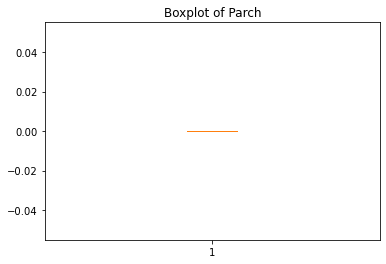

In [157]:
plt.boxplot(df['Parch'])
plt.title('Boxplot of Parch')

# 6.Do min max scaling on the feature set (Take ‘Survived’ as target)

In [50]:
df.Name.nunique()

607

In [51]:
df.Sex.nunique()

2

In [52]:
df.Embarked.nunique()

3

In [53]:
df.Ticket.nunique()

556

we will drop the columns Name and Ticket from the data frame and will do encoding for tne columns Sex and Embarked

In [54]:
df1=df.drop(['Ticket','Name'],axis=1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
6,0,3,male,28.0,0,0,8.4583,Q


In [55]:
df2=pd.get_dummies(df[['Sex','Embarked']])
df2.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,
1,0,1,0,0,1
3,1,0,0,0,1
4,1,0,0,0,1
5,0,1,0,0,1
6,0,1,0,1,0


In [56]:
data=pd.concat([df1,df2],axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1
3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1
4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1
5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1
6,0,3,male,28.0,0,0,8.4583,Q,0,1,0,1,0


In [134]:
data1=data.drop(['Sex','Embarked'],axis=1)
data1.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1
6,0,3,28.0,0,0,8.4583,0,1,0,1,0


<AxesSubplot:>

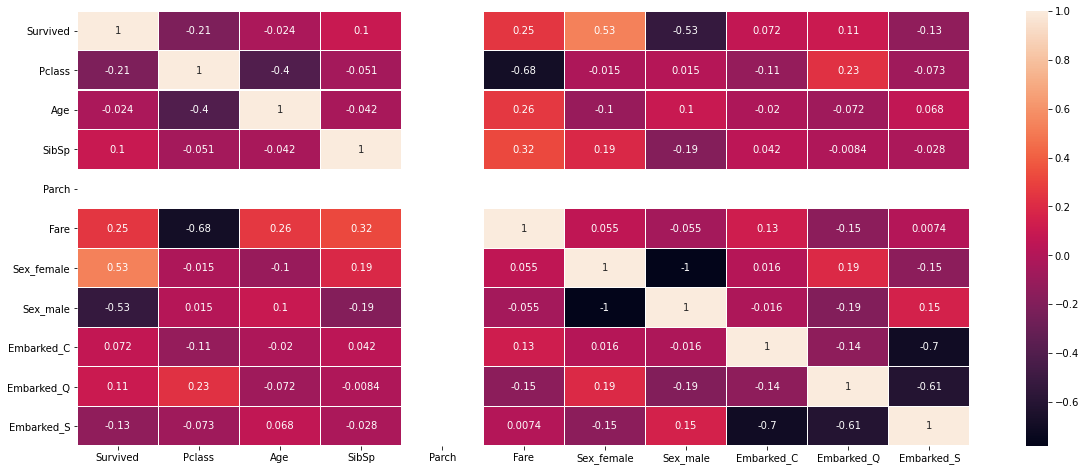

In [135]:
#creating correlation matrix
corrmatrix=data1.corr()
plt.subplots(figsize=(20,8))
sb.heatmap(corrmatrix,vmin=-0.78,vmax=1,annot=True,linewidth=0.2)

In [136]:
y=data1['Survived']
x=data1.drop(['Survived'],axis=1)

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.25)

In [139]:
from sklearn import linear_model

In [140]:
lr=linear_model.LinearRegression()


In [143]:
model=lr.fit(x_train,y_train)

In [145]:
predictions=model.predict(x_test)


In [147]:
from sklearn.metrics import mean_squared_error
print('MSE is :',mean_squared_error(y_test,predictions))



MSE is : 0.13528369390356135


In [148]:
from sklearn.metrics import r2_score
print('R squared value is :',r2_score(y_test,predictions))

R squared value is : 0.27848696584767274


In [149]:
#min max scaling
X=data1.drop(['Survived'],axis=1)
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,607.000000,607.000000,607.000000,607.0,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,2.462932,30.935750,0.189456,0.0,15.226413,0.242175,0.757825,0.140033,0.110379,0.749588
std,0.758794,11.079706,0.436027,0.0,12.616712,0.428753,0.428753,0.347307,0.313620,0.433608
min,1.000000,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,0.000000,0.0,7.775000,0.000000,1.000000,0.000000,0.000000,0.500000
50%,3.000000,28.000000,0.000000,0.0,8.850000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,34.250000,0.000000,0.0,16.750000,0.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,2.000000,0.0,61.175000,1.000000,1.000000,1.000000,1.000000,1.000000


In [150]:
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))


In [151]:
X=min_max.fit_transform(X)



In [152]:
X=pd.DataFrame(X)


In [153]:
X.describe()

,0,1,2,3,4,5,6,7,8,9
count,607.000000,607.000000,607.000000,607.0,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,0.731466,0.345810,0.094728,0.0,0.248899,0.242175,0.757825,0.140033,0.110379,0.749588
std,0.379397,0.147729,0.218014,0.0,0.206240,0.428753,0.428753,0.347307,0.313620,0.433608
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.266667,0.000000,0.0,0.127094,0.000000,1.000000,0.000000,0.000000,0.500000
50%,1.000000,0.306667,0.000000,0.0,0.144667,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.390000,0.000000,0.0,0.273805,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
#creating linear regression model
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)
print('MSE is :',mean_squared_error(y_test,predictions))
print('R squared value is :',r2_score(y_test,predictions))

MSE is : 0.13485557154605263
R squared value is : 0.2807702850877193


There is a slight increase the MSE value & R-squared value after min max scaling